### Visualisation d’un nuage de points et exploration des variables

#### Importation des librairies nécessaires

Avec des alias pour faciliter leurs usages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Création de notre Dataset

Première version, faite sans vraiment connaître la librairie pandas. Ça fonctionne, avec quelques défauts, notamment la gestion des NA qui est différente entre cette méthode et celle proposée par pandas.

Ça ne sert à rien de réutiliser ce code car une fonction de pandas le fait mieux que nous (voir après).

In [2]:
# Façon artisanale (à ne pas refaire)
with open("source/house_pricing.csv", mode="r", encoding="utf-8") as f:
    
    # La 1ère ligne contient les noms de colonne, les autres lignes contiennent les données
    # Le -1 dans les slicing sert à enlever le \n présent à la fin de chaque ligne
    head = f.readline()[:-1].split(",")
    data = []
    for l in f:
        data += [l[:-1].split(",")]
    
    
    df = pd.DataFrame(data, columns = head)
    

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


Méthode __read_csv de pandas__, bien plus courte et plus optimale. À privilégier.

In [4]:
# Façon industrielle (à privilégier)
df2 = pd.read_csv("source/house_pricing.csv")

In [5]:
# Description de la DataFrame
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#### Première visualisation graphique de nos données

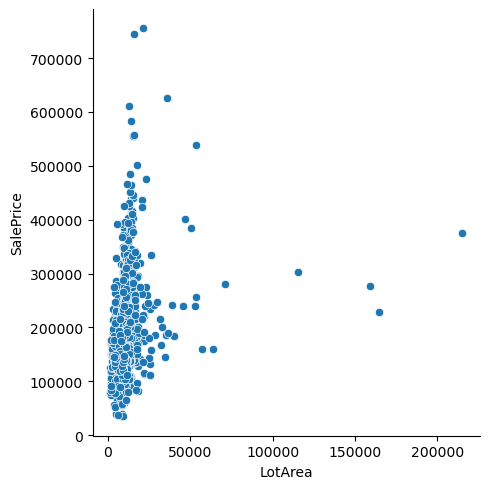

In [6]:
# Affichage des SalePrice par rapport au LotArea avec uniquement les données où SalePrice < 500k et LotArea < 20k
g = sns.relplot(x="LotArea", y="SalePrice", data=df2)
plt.show()

##### Problème

Des données isolées rallongent les abscisses et les ordonnées et ne permettent pas de bien analyser la zone où se trouvent la grande majorité des données.\
On parle de __valeurs aberrantes__, que l'on va essayer d'écarter de notre DataFrame à l'aide d'un filtrage.

#### Filtrage des données

Pour réduire le focus du graph sur la zone où ont l'air d'être nos données, on décide de filtrer la colonne SalePrice en conservant uniquement les valeurs inférieures à 500\_000 et pareil pour la colonne LotArea pour les données inférieures à 20\_000.

On applique ce filtrage directement en paramètres de la fonction relplot.

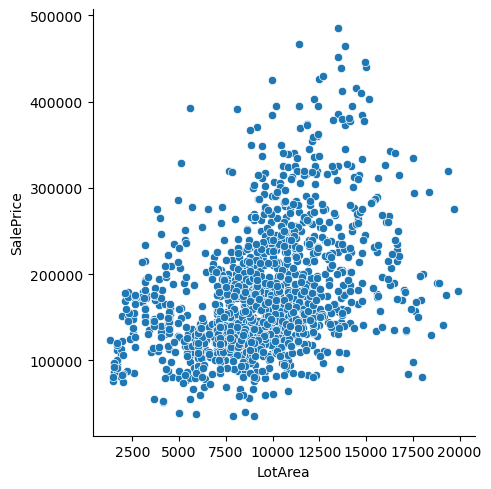

In [7]:
# Affichage des SalePrice par rapport au LotArea avec uniquement les données où SalePrice < 500k et LotArea < 20k
g = sns.relplot(x="LotArea", y="SalePrice", data=df2[(df2["SalePrice"] < 500000) & (df2["LotArea"] < 20000)])
plt.show()

##### Analyse de ce 1er graphique

Il y a une __faible corrélation__ entre le prix du bien immobilier et sa superficie. Mais cette corrélation n'est pas si évidente étant donné la répartition de ce nuage de points.

#### Visualisation de LotFrontage par rapport à LotArea

LotArea est donc la superficie d'un bien immobilier. LotFrontage semble être la superficie de la façade qui se trouve face à la rue.

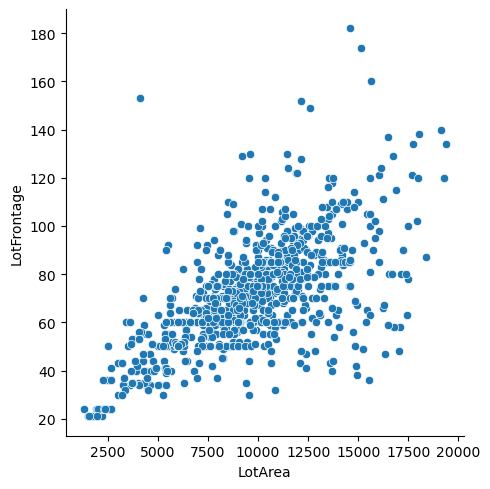

In [8]:
# Affichage des LotFrontage par rapport au LotArea avec uniquement les données où LotFrontage < 500k et LotArea < 20k
g2 = sns.relplot(x="LotArea", y="LotFrontage", data=df2[(df2["LotFrontage"] < 200) & (df2["LotArea"] < 20000)])
plt.show()

##### Analyse de ce 2nd graphique

Il y a une __corrélation nette__ entre ces 2 paramètres. Plus la façade face à la rue du bien est grande, plus sa superficie est grande aussi. C'est plutôt intuitif de voir ce lien.\
Métaphoriquement, _plus la longueur d'un rectangle est grande, plus son aire est grande aussi_.

In [11]:
type(df2.iloc[0])

pandas.core.series.Series

In [18]:
df2.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [23]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    print(df2)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
...          ...       ...       ...       ...          ...        ...   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0   

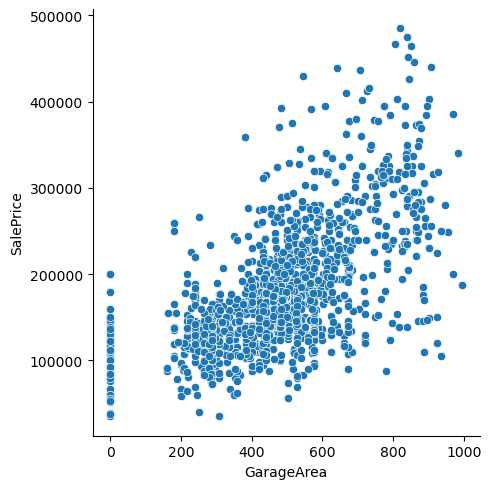

In [26]:
g3 = sns.relplot(x="GarageArea", y="SalePrice", data=df2[(df2["SalePrice"] < 500_000) & (df2["GarageArea"] < 1_000)])
plt.show()

In [33]:
df2[(df2["SalePrice"] < 500_000) & (df2["GarageArea"] < 1_000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [38]:
dir(pd.DataFrame)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__'

In [36]:
help(pd.core)

Help on package pandas.core in pandas:

NAME
    pandas.core

PACKAGE CONTENTS
    _numba (package)
    accessor
    algorithms
    api
    apply
    array_algos (package)
    arraylike
    arrays (package)
    base
    common
    computation (package)
    config_init
    construction
    describe
    dtypes (package)
    flags
    frame
    generic
    groupby (package)
    index
    indexers (package)
    indexes (package)
    indexing
    internals (package)
    missing
    nanops
    ops (package)
    resample
    reshape (package)
    roperator
    sample
    series
    shared_docs
    sorting
    sparse (package)
    strings (package)
    tools (package)
    util (package)
    window (package)

FILE
    /home/stagiaire/anaconda3/lib/python3.9/site-packages/pandas/core/__init__.py


